# Just Another Kernel Cookbook

Following a great two weeks at the Machine Learning Summer School (Tubinger, Germany) I have regained an interest in kernels. If you want to get a bit of an insight into kernel methods I would strongly recomend going through Arthur Gretton's lecture slides and notes for the summer school and his course on advanced topics in machine learning (link: http://www.gatsby.ucl.ac.uk/~gretton/teaching.html ).

I reckon anyone who works on Gaussian Processes or related topics should know a bag of useful kernels which they can play with. Unfortunately, too often people rely on gaussian kernels (aka squared expodential, expodentiated quadratic and RBF kernels). This really limits what you can do. 

David Duvenaud made a handy resource called the kernel cookbook (link: http://people.seas.harvard.edu/~dduvenaud/cookbook/ ) which acts as a great little cheat sheet for how to make your own kernel via addition and multiplication of simple kernels. The SVM community also extensively use kernels and there are many great resources such as Kernel Functions for Machine Learning Applications (link: http://crsouza.com/2010/03/kernel-functions-for-machine-learning-applications/ ). 

This workbook contains Python implementations of the kernels in Kernel Functions for Machine Learning Applications and draws samples of functions from a GP with each of the kernels. The idea is simply to let you copy and paste any of them into what ever projects you happen to be working on.

In [1]:
%pylab inline
import numpy as np
import scipy as sp
import pylab as pb
import os
import sys

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## Linear Kernel

$K(x, y) = \sigma_a^2 + \sigma_b^2(x - c)(y - c)$

(400, 400)


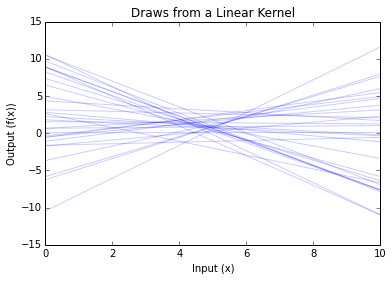

In [2]:
def linear_kernel(x, y, a, b, c):
    x = x - c
    y = y - c
    
    k = a**2 + (b**2)*np.multiply.outer(x,y)
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = linear_kernel(T, T, 1, 1, 5)
print K.shape

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Linear Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Polynomial Kernel

$K(x, y) = (\sigma_a^2 + \sigma_b^2(x - c)(y - c))^d$

(400, 400)


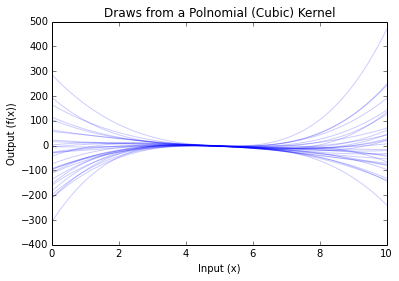

In [3]:
def polynomial_kernel(x, y, a, b, c, d):
    x = x - c
    y = y - c
    
    k = (a**2 + (b**2)*np.multiply.outer(x,y))**d
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = polynomial_kernel(T, T, 1, 1, 5, 3)
print K.shape

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Polnomial (Cubic) Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Gaussian Kernel

$K(x, y) = \sigma^2 exp(- \frac{(x - y)^2}{2 l^2})$

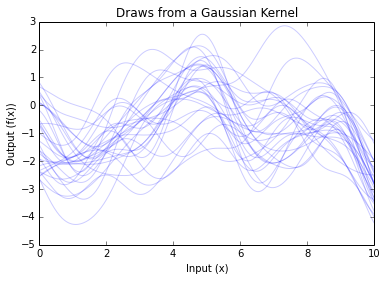

In [4]:
def gaussain_kernel(x, y, s, l):
    k = (s**2)*np.exp(-(np.subtract.outer(x,y)**2)/(2*l**2))
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = gaussain_kernel(T, T, 1, 1)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Gaussian Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Expodential Kernel

$K(x, y) = \sigma^2 exp(- \frac{||x - y||}{2 l^2})$

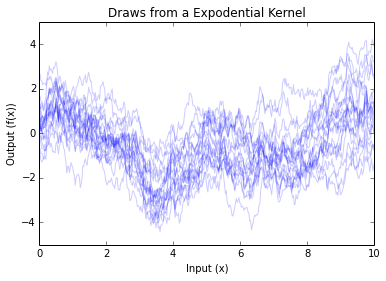

In [5]:
def expodential_kernel(x, y, s, l):
    k = (s**2)*np.exp(-np.abs(np.subtract.outer(x,y))/(2*l**2))
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = expodential_kernel(T, T, 1, 1)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(20):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Expodential Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## ANOVA Kernel

$K(x, y) = \sum_{k=1}^n exp(- \sigma (x^k - y^k)^2)^d$

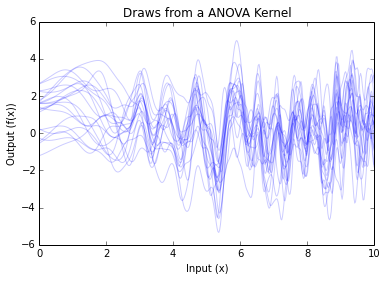

In [6]:
def anova_kernel(x, y, n, s, d):
    k = np.exp(-(np.subtract.outer(x,y)**2)*s)**d
    for i in range(2,n):
        k += np.exp(-(np.subtract.outer(x**i,y**i)**2)*s)**d
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = anova_kernel(T, T, 3, 0.1, 2)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(20):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a ANOVA Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Hyperbolic Tangent (Sigmoid) Kernel

$K(x, y) = tanh(\sigma_a^2 + \sigma_b^2(x - c)(y - c))$

(400, 400)


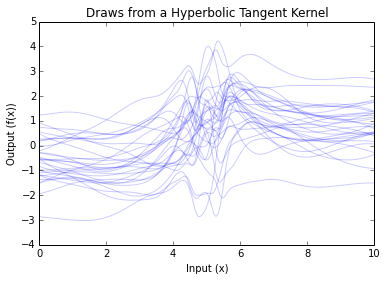

In [7]:
def hyperbolic_tangent_kernel(x, y, a, b, c):
    x = x - c
    y = y - c
    
    k = np.tanh(a**2 + (b**2)*np.multiply.outer(x,y))
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = hyperbolic_tangent_kernel(T, T, 1, 1, 5)
print K.shape

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Hyperbolic Tangent Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

##Rational Quadratic Kernel

$K(x, y) = \sigma^2 (1 + \frac{(x - y)^2}{2 \alpha l^2})^{-\alpha}$

(400, 400)


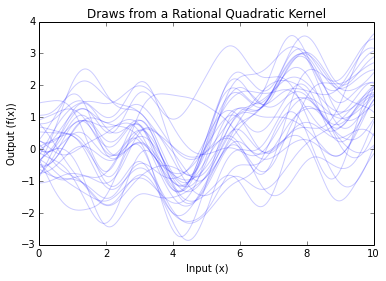

In [8]:
def rational_quadratic_kernel(x, y, s, l, a):
    k = s**2*(1 + np.subtract.outer(x,y)**2/(2*a*l**2))**-a
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = rational_quadratic_kernel(T, T, 1, 1, 5)
print K.shape

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Rational Quadratic Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Multiquadric Kernel

$K(x, y) = \sigma^2 \sqrt{(x - y)^2 + c^2}$

(400, 400)


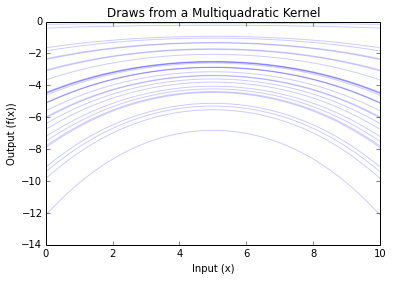

In [9]:
def multiquadratic_kernel(x, y, s, c):
    k = s**2*(np.subtract.outer(x,y)**2 + c**2)**0.5
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = multiquadratic_kernel(T, T, 1, 0.5)
print K.shape

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Multiquadratic Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Inverse Multiquadric Kernel

$K(x, y) = \sigma^2 \frac{1}{\sqrt{(x - y)^2 + c^2}}$

(400, 400)


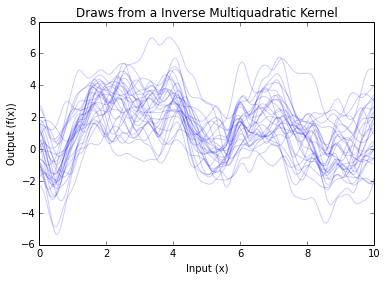

In [10]:
def inverse_multiquadratic_kernel(x, y, s, c):
    k = s**2*(np.subtract.outer(x,y)**2 + c**2)**-0.5
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = inverse_multiquadratic_kernel(T, T, 1, 0.5)
print K.shape

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Inverse Multiquadratic Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Wave Kernel

$K(x, y) = \frac{\theta}{||x - y|| + d} sin(\frac{||x - y||}{\theta})$

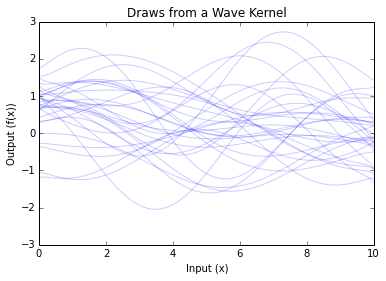

In [11]:
def wave_kernel(x, y, t, d):
    th = np.abs(np.subtract.outer(x,y))/t
    k = (1/(th+d))*np.sin(th)
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = wave_kernel(T, T, 1, 0.1)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Wave Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Power Kernel

$K(x,y) = -||x-y||^d$

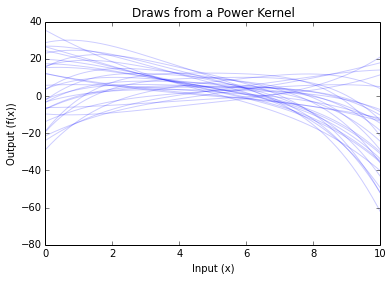

In [12]:
def power_kernel(x, y, d):
    k = - np.abs(np.subtract.outer(x,y))**d    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = power_kernel(T, T, 3)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Power Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Log Kernel

$K(x, y) = - log(||x - y||^d + 1)$

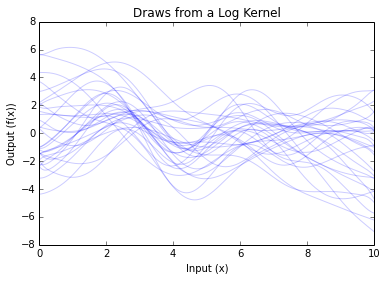

In [13]:
def log_kernel(x, y, d):
    k = - np.log(np.abs(np.subtract.outer(x,y))**d + 1)   
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = log_kernel(T, T, 3)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Log Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Cauchy Kernel

$K(x, y) = \frac{1}{1+ ||x - y||^2/\sigma^2}$

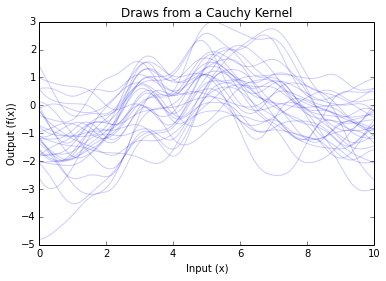

In [14]:
def cauchy_kernel(x, y, s):
    k = 1/(1+(np.subtract.outer(x,y))**2/s)   
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = cauchy_kernel(T, T, 3)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Cauchy Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Generalized Student T Kernel

$K(x, y) = \frac{1}{1+ ||x - y||^d}$

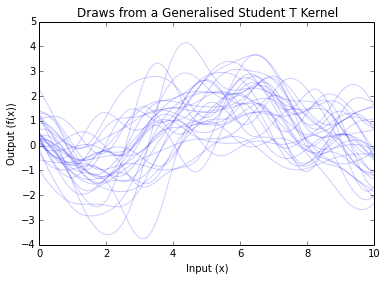

In [15]:
def generalised_student_t_kernel(x, y, d):
    k = 1/(1+np.abs(np.subtract.outer(x,y))**d)   
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = generalised_student_t_kernel(T, T, 3)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Generalised Student T Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

## Periodic Kernel

$K(x, y) = \sigma^2 exp(- \frac{sin(\pi(x - y)^2/p)}{2 l^2})$

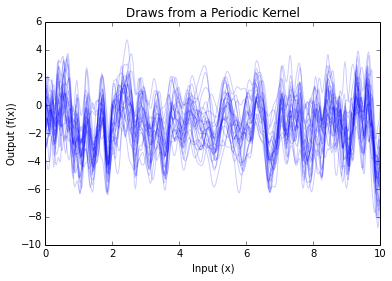

In [16]:
def periodic_kernel(x, y, s, l, p):
    k = (s**2)*np.exp(-(np.sin(np.pi*np.subtract.outer(x,y)**2/p))/(2*l**2))
    
    return k

T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = periodic_kernel(T, T, 1, 1, 3)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Periodic Kernel')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

##Conclusion

Well hopefully this is a useful set of kernels to start playing with. Remember you can add together and multiply together kernels in order to make new and more iteresting kernels. If this is something you are interested in you should also probably check out the automated statistician (link: http://www.automaticstatistician.com/). 

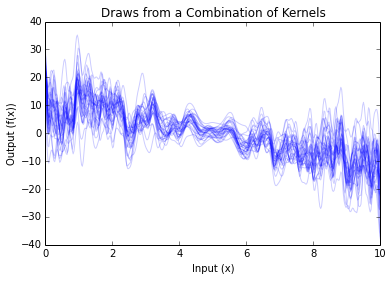

In [17]:
T = np.linspace(0, 10, 400).reshape(400,)

#compute the covariance matrices
K = periodic_kernel(T, T, 1, 1, 3)*linear_kernel(T, T, 1, 1, 5) + log_kernel(T, T, 3)

g = np.random.multivariate_normal(np.zeros(400), K)
for r in range(30):
    f = np.random.multivariate_normal(g, K)
    plt.plot(T, f, 'b', linewidth=1, label='$f(t)$' if r==0 else None, alpha=0.2)
plt.title('Draws from a Combination of Kernels')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')

Spotted a mistake or want to ask any questions? Email me at jack@robots.ox.ac.uk